# Modèle de l'accélération constante

![alt text](fl971126.jpg "Title")

## Expérience de chute libre


Nous allons illustrer le processus de modélisation avec une expérience simple: la **chute libre à une dimension**. Prenons un objet et laissons le tomber d'une certaine hauteur, sans lui donner de vitesse initiale.

Afin de modéliser cette expérience, il faut d'abord choisir un système de référence. Nous choisissons un axe vertical, dirigé dans le sens du mouvement de l'objet qui tombe. Appelons-le l'axe $z$. Nous choisissons l'origine de ce repère à l'endroit où l'on lâche l'objet, à $z=0$. L'objet est modélisé comme une particule ponctuelle.

Nous savons que l'objet est soumis au champ de pesanteur terrestre, $g \simeq 9.81$ m.s$^{-2}$. D'après les relations fondamentales de la dynamique et la loi de la gravitation universelle, il est donc soumis à une accélération constante:
\begin{equation}
a(t) = \frac{dv}{dt}(t) = g
\end{equation}

En intégrant cette équation, on obtient la vitesse du corps en fonction du temps: 
\begin{equation}
v(t) = g t
\end{equation}

Le modèle mathématique de la vitesse physique du corps est une fonction à une variable $v:\mathbb{R}\to\mathbb{R}$. Nous pouvons représenter numériquement cette fonction de nombreuses façons différentes. Par exemple avec:

- deux tableaux Numpy à 1 dimension qui représentent la vitesse et le temps ;
- un tableau Numpy à 2 dimension dont une colonne représente le temps, et l'autre colonne la vitesse ;
- un DataFrame Pandas dont l'index représente le temps, et une colonne représente la vitesse ;
- une fonction Python dont l'argument représente le temps, et la sortie de la fonction représente la vitesse.

Nous allons illustrer ces différentes possibilités.

## Représentation discrète de la vitesse

Alors que la fonction $v$ est une fonction mathématique continue de $\mathbb{R}$ dans $\mathbb{R}$, c'est-à-dire dont le domaine de définition contient un nombre infini de valeurs, un tableau Numpy ne peut contenir qu'un nombre fini de valeurs. Il faut donc choisir un nombre fini de valeurs du temps $t$ pour lesquels nous allons calculer la vitesse $v$. On appelle cela une **représentation discrète**.

Choisissons de représenter la fonction $v$ entre $t=0$ s et $t = 10$ s, avec un pas de 1 s. Pour remplir le tableau Numpy, on peut utiliser la fonction `linspace()` du module Numpy (voir *les fonctions de Numpy - Intervalles et pas*):

In [1]:
# importation du module numpy
import numpy as np

# parametres de la discretisation
temps_initial = 0 # s
temps_final = 10 # s
pas_temps = 1 # s

# creation du tableau temps
intervalle = temps_final - temps_initial
num_points = int(intervalle / pas_temps) + 1   # nombre d'éléments
temps = np.linspace(temps_initial, temps_final, num_points)

Voyons ce que contient le tableau `temps`:

In [2]:
print(temps)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Il contient bien les valeurs du temps entre 0 et 10 s avec un pas de 1 s. Afin de calculer la vitesse pour ces temps il suffit d'appliquer la formule $v = gt$ au tableau Numpy `temps`, pour créer le tableau Numpy `vitesse`. Cependant, pour que cela soit possible, il faut aussi créer une variable `pesanteur` qui contient la valeur de la pesanteur:

In [3]:
# creation de la variable pesanteur
pesanteur = 9.81 # m.s**-2

# calcul du tableau vitesse
vitesse = pesanteur * temps

Voyons ce que contient le tableau vitesse:

In [4]:
print(vitesse)

[ 0.    9.81 19.62 29.43 39.24 49.05 58.86 68.67 78.48 88.29 98.1 ]


Le tableau `vitesse` contient les valeurs de la vitesse aux temps correspondant aux valeurs du tableau `temps`.

## Représentation graphique de la vitesse

A partir des 2 tableaux Numpy `temps` et `vitesse`, qui sont une représentation numérique possible du temps et de la vitesse de l'objet qui chute, il est facile grâce au module Matplotlib d'obtenir une représentation graphique (voir *le module Matplotlib - Représentation graphique d'une fonction mathématique*):

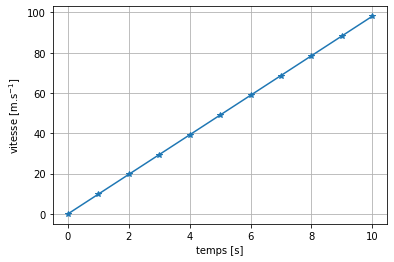

In [5]:
# importation du module pyplot de matplotlib
import matplotlib.pyplot as plt

# creation de la figure
plt.plot(temps, vitesse, '-*')

# style
plt.xlabel('temps [s]')
plt.ylabel('vitesse [m.s$^{-1}$]')
plt.grid()

Sur la figure nous avons explicitement mis des points pour montrer la discrétisation de la fonction $v$.

Voyons maintenant comment modéliser le temps et la vitesse numériquement avec un objet `DataFrame` du module Pandas (voir le module *Dictionnaires et Pandas*). Nous allons d'abord créer un *index* contenant les temps du tableau `temps`. Pour cela, nous utilisons la fonction `to_datetime` de Pandas ([voir l'aide de cette fonction](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)):

In [6]:
# importation du module pandas
import pandas as pd

# creation de l'index contenant les dates de la discretisation
index_temps = pd.to_datetime(temps, unit='s', origin='2020-03-14 13:45:00')

Nous avons spécifié l'unité de temps avec l'option `unit`, et la date correspondant au temps $t=0$ s avec l'option `origin`. Nous pouvons alors créer le DataFrame `df_vitesse` avec la commande:

In [7]:
df_vitesse = pd.DataFrame(data=vitesse, index=index_temps, columns=['vitesse'])

On peut afficher les premières lignes du DataFrame:

In [8]:
df_vitesse.head(n=6)

,vitesse
2020-03-14 13:45:00,0.00
2020-03-14 13:45:01,9.81
2020-03-14 13:45:02,19.62
2020-03-14 13:45:03,29.43
2020-03-14 13:45:04,39.24
2020-03-14 13:45:05,49.05


Cette représentation numérique a l'avantage d'être située dans le temps de façon non ambigue, avec des dates. Cela peut être très utile lorsque l'on veut représenter ou modéliser les données d'une expérience. Il suffit alors pour la représentation graphique d'écrire:

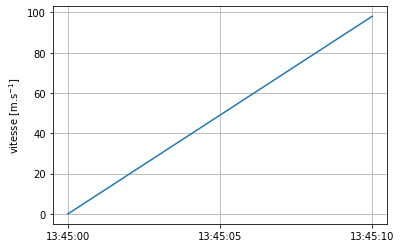

In [9]:
# creation de la figure
plt.plot(df_vitesse)

# style
plt.ylabel('vitesse [m.s$^{-1}$]')
plt.grid()

## Représentation sous la forme d'une fonction

Il est possible de représenter la vitesse du corps en chute libre sous la forme d'une fonction python (voir le module *fonction*):

In [10]:
# creation de la fonction
def func_vitesse(temps):
    return pesanteur * temps

Avec cette représentation nous pouvons alors calculer la vitesse pour n'importe quel temps. Cela est un avantage certain par rapport à la représentation discrète, où nous avons accès à la vitesse que pour des temps donnés. Cependant, il n'est possible de représenter une grandeur physique de cette façon *seulement* si on connaît sa forme analytique.

Par exemple, la vitesse au temps $t = 34.76$ s est:

In [11]:
print(func_vitesse(34.76))

340.9956


On peut aussi obtenir facilement un tableau Numpy des vitesses correspondant au tableau `temps`:

In [12]:
print(func_vitesse(temps))

[ 0.    9.81 19.62 29.43 39.24 49.05 58.86 68.67 78.48 88.29 98.1 ]


Ainsi, grâce à la fonction, on n'est pas obligé de définir un tableau `vitesse` intermédiaire pour représenter graphiquement la fonction. On peut écrire simplement:

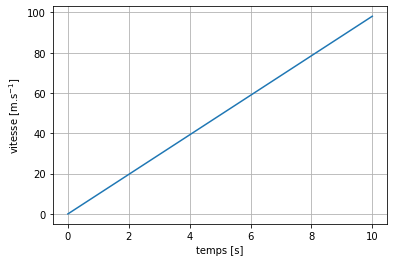

In [13]:
# creation de la figure
plt.plot(temps, func_vitesse(temps))

# style
plt.xlabel('temps [s]')
plt.ylabel('vitesse [m.s$^{-1}$]')
plt.grid()

## Représentation de la position

En intégrant la vitesse de l'objet en chute par rapport au temps
$$ v(t) = \frac{dz}{dt}(t) = g t$$

on obtient une nouvelle représentation du mouvement de la particule, sa position par rapport au temps:
$$z(t) = \frac{1}{2}gt^2$$

Afin de représenter numériquement cette nouvelle fonction du temps, il suffit de créer un nouveau tableau Numpy `position_z` avec:

In [14]:
# création du tableau position_z
position_z = 1/2 * pesanteur * temps**2

Voyons ce que contient ce tableau:

In [15]:
print(position_z)

[  0.      4.905  19.62   44.145  78.48  122.625 176.58  240.345 313.92
 397.305 490.5  ]


Représentons graphiquement les trois représentations du mouvement de l'objet en chute libre: accélération, vitesse et position. Afin de représenter numériquement l'accélération en fonction du temps, on crée un tableau Numpy constant `acceleration`, de la même taille que le tableau `temps`, avec la fonction `ones()`:

In [16]:
# creation du tableau acceleration
acceleration = np.ones(temps.shape) * pesanteur

# affichage du tableau
print(acceleration)

[9.81 9.81 9.81 9.81 9.81 9.81 9.81 9.81 9.81 9.81 9.81]


En affichant le tableau, nous vérifions que nous n'avons pas fait d'erreur. En effet, il est très important quand nous programmons de bien vérifier que chaque étape, chaque ligne qu'on écrit fait bien ce que l'on attend.

Ensuite, mettons les trois représentations graphiques l'une en dessous de l'autre grâce à la fonction `subplot`:

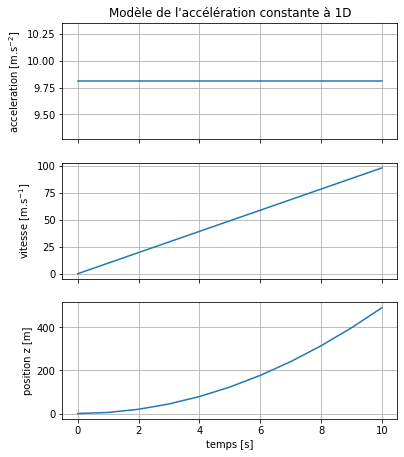

In [17]:
# représentation de l'accélération
plt.subplot(3,1,1)
plt.plot(temps, acceleration)
plt.ylabel('acceleration [m.s$^{-2}$]')
plt.grid()
plt.tick_params(axis='x', labelbottom=False) # retire les label de l'axe x
plt.title("Modèle de l'accélération constante à 1D")

# représentation de la vitesse
plt.subplot(3,1,2)
plt.plot(temps, vitesse)
plt.ylabel('vitesse [m.s$^{-1}$]')
plt.grid()
plt.tick_params(axis='x', labelbottom=False) # retire les label de l'axe x

# représentation de la position z
plt.subplot(3,1,3)
plt.plot(temps, position_z)
plt.ylabel('position z [m]')
plt.xlabel('temps [s]')
plt.grid()

plt.subplots_adjust(top=1.5) # agrandit l'espace entre les figures

## Représentation du mouvement

La pesanteur est dirigée le long de l'axe $z$. Nous savons donc que suivant les deux autres axes $x$ et $y$, dans un référentiel inertiel, il n'y a pas de mouvement. Supposons qu'initialement $x=2$ m. Nous voulons représenter le mouvement du corps en chute libre dans le plan $(xOz)$. Nous allons d'abord créer le tableau constant représentant la position suivant l'axe $x$:

In [18]:
# position suivant l'axe x
position_x = np.ones(temps.shape) * 2 # m

# verification du tableau
print(position_x)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


Nous pouvons maintenant représenter graphiquement le mouvement de la particule grâce aux deux tableaux position:

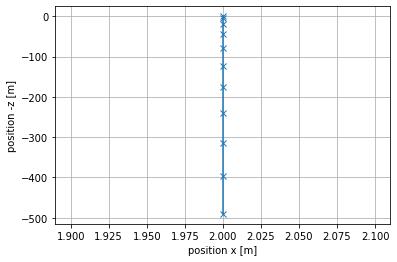

In [19]:
# representation graphique du mouvement
plt.plot(position_x, -position_z, 'x-')

# style
plt.xlabel("position x [m]")
plt.ylabel("position -z [m]")
plt.grid()

Nous avons sur la représentation graphique renversé l'axe $z$ car nous avons plutôt l'habitude de voir les objets tomber de haut en bas plutôt que de bas en haut. La représentation discrète du mouvement, avec un pas de temps constant, nous permet de bien voir (avec les croix) l'effet de l'accéleration sur la position.

## Représenter des données
Des étudiants ont effectués une expérience de chute libre dans l'Atrium: ils ont fait tomber un objet de chaque étage de l'Atrium, sans vitesse initiale, et ont mesuré à chaque fois le temps de chute $T$ de l'objet ainsi que la hauteur de l'étage $H$. On reporte dans le tableau ci-dessous le résultat des mesures pour 4 groupes différents:

| étage | 1 | 2 | 3 | 4 | 5
|--|--|--|--|--|--
| hauteur de l'étage (m) | 7.40 | 10.80 | 14.20 | 17.60 | 20.95
| temps de chute (s) - groupe 1 | 1.09 | 1.39 | 1.70 | 2.05 | 2.25
| temps de chute (s) - groupe 2 | 1.17 | 1.54 | 1.72 | 2.18 | 2.40
| temps de chute (s) - groupe 3 | 1.33 | 1.68 | 1.56 | 2.19 | 2.40
| temps de chute (s) - groupe 4 | 0.95 | 1.61 | 1.49 | 2.16 | 2.18

Selon le modèle de l'accélération constante, la relation entre la hauteur de l'étage *H* et le temps de chute *T* est:
$$ H = \frac{1}{2} g T^2 $$

Représentons graphiquement le modèle (en ligne continue) et les données (avec des croix), grâce à des tableaux Numpy:

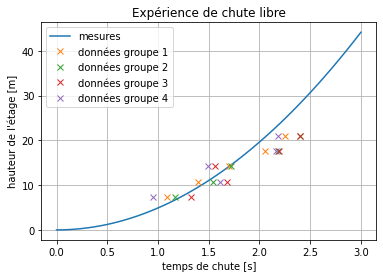

In [20]:
# modele
temps_chute_modele = np.linspace(0.0, 3.0) # s
hauteur_etage_modele = 1/2 * pesanteur * temps_chute_modele**2

# mesures de la hauteur des etages
hauteur_etage_mesure = np.array([7.40, 10.80, 14.20, 17.60, 20.95]) # m

# mesures des temps de chute pour les 4 groupes
temps_chute_groupe1 = np.array([1.09, 1.39, 1.70, 2.05, 2.25]) # s
temps_chute_groupe2 = np.array([1.17, 1.54, 1.72, 2.18, 2.40]) # s
temps_chute_groupe3 = np.array([1.33, 1.68, 1.56, 2.19, 2.40]) # s
temps_chute_groupe4 = np.array([0.95, 1.61, 1.49, 2.16, 2.18]) # s

# représentation graphique du modèle
plt.plot(temps_chute_modele, hauteur_etage_modele)

# representation graphique des données
plt.plot(temps_chute_groupe1, hauteur_etage_mesure, 'x')
plt.plot(temps_chute_groupe2, hauteur_etage_mesure, 'x')
plt.plot(temps_chute_groupe3, hauteur_etage_mesure, 'x')
plt.plot(temps_chute_groupe4, hauteur_etage_mesure, 'x')

# style
plt.title("Expérience de chute libre")
plt.xlabel("temps de chute [s]")
plt.ylabel("hauteur de l'étage [m]")
plt.grid()
plt.legend(("mesures", "données groupe 1", "données groupe 2", "données groupe 3", "données groupe 4"))